In [ ]:
Diabetes Prediction using KNN and Ann - Gautamkumar Mishra

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Deep Learning/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NAN)

In [ ]:
df.isna().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a688ec190>,
      dtype=object)

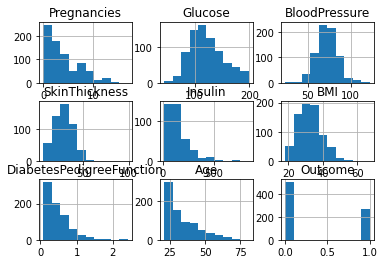

In [ ]:
df.hist()

In [ ]:
df['Glucose']=df['Glucose'].fillna(df['Glucose'].mean())

In [ ]:
df.isna().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.000000
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [ ]:
df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].mean())

In [ ]:
df.isna().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.000000
BloodPressure                0.000000
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [ ]:
df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].median())

In [ ]:
df.isna().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.000000
BloodPressure                0.000000
SkinThickness                0.000000
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [ ]:
df['Insulin']=df['Insulin'].fillna(df['Insulin'].median())

In [ ]:
df.isna().sum()/len(df)*100

Pregnancies                 0.000000
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.000000
BMI                         1.432292
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [ ]:
df['BMI']=df['BMI'].fillna(df['BMI'].median())

In [ ]:
df.isna().sum()/len(df)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

## EDA

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

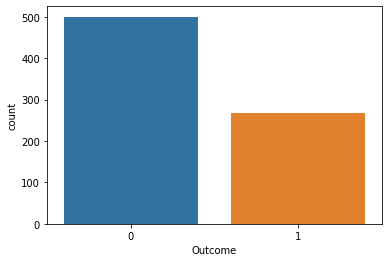

In [ ]:
sns.countplot(df['Outcome'])

### From above chart we can say that our target variable is imbalanced

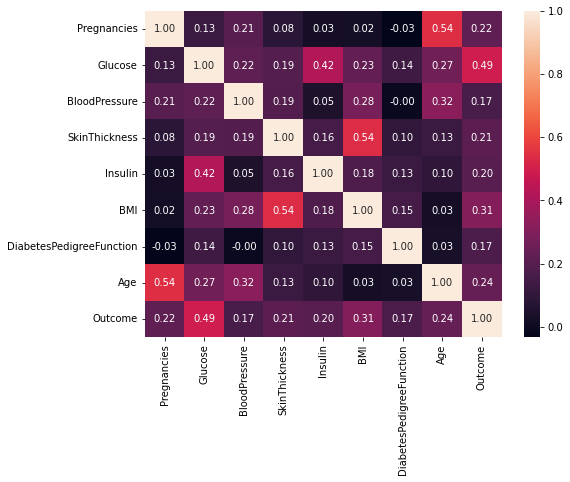

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [ ]:
#sns.pairplot(data=df,hue='Outcome')

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
#Splitting data into train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test.shape

(154, 8)

In [ ]:
y_train.shape

(614,)

In [ ]:
y_test.shape

(154,)

In [ ]:
#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)

In [ ]:
X_test=sc.fit_transform(X_test)

In [ ]:
#Model Building 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,f1_score

In [ ]:
print('Train Data')
print(classification_report(y_train,y_pred_train))
print('Test Data')
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       401
           1       0.75      0.69      0.72       213

    accuracy                           0.81       614
   macro avg       0.80      0.79      0.79       614
weighted avg       0.81      0.81      0.81       614

Test Data
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        99
           1       0.77      0.65      0.71        55

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



In [ ]:
#Hyper paramter Tunning

In [ ]:
param_grid={
    'n_neighbors':np.arange(1,15),
    'weights':['uniform','distance'],
    'metric':['minkowski','euclidean','manhattan']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gridclf=GridSearchCV(clf,param_grid=param_grid,scoring='f1',cv=5,n_jobs=-1)
gridclf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
gridclf.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [ ]:
gridclf.best_score_

0.6352268078178722

In [ ]:
#Prediction

In [ ]:
clf=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 9, weights= 'uniform')
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
print('Train Data')
print(classification_report(y_train,y_pred_train))
print('Test Data')
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       401
           1       0.76      0.67      0.71       213

    accuracy                           0.81       614
   macro avg       0.79      0.78      0.78       614
weighted avg       0.81      0.81      0.81       614

Test Data
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        99
           1       0.78      0.64      0.70        55

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [ ]:
from sklearn.utils import resample

In [ ]:
has_db=df[df['Outcome']==1]
noth_db=df[df['Outcome']==0]

In [ ]:

hasdb_downsample = resample(has_db,
             replace=True,
             n_samples=len(noth_db),
             random_state=42)

print(hasdb_downsample.shape)

(500, 9)


In [ ]:
df_downsampled = pd.concat([hasdb_downsample, noth_db])

print(df_downsampled["Outcome"].value_counts())

1    500
0    500
Name: Outcome, dtype: int64


In [ ]:
X=df.iloc[:,:-1].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y=df.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X=sc.fit_transform(X)

In [ ]:
X

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
ann=Sequential()

In [ ]:
ann.add(Dense(units=5,activation='relu'))

In [ ]:
#Output layer

In [ ]:
ann.add(Dense(units=1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','Recall'])

In [ ]:
ann.fit(X_train,y_train,epochs=150,batch_size=35)

Epoch 1/150
16/16 [==============================] - 1s 2ms/step - loss: 0.7527 - accuracy: 0.4581 - recall: 0.3209
Epoch 2/150
16/16 [==============================] - 0s 3ms/step - loss: 0.7268 - accuracy: 0.4972 - recall: 0.3155
Epoch 3/150
16/16 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.5549 - recall: 0.3048
Epoch 4/150
16/16 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6034 - recall: 0.2941
Epoch 5/150
16/16 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.6294 - recall: 0.2941
Epoch 6/150
16/16 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.6536 - recall: 0.2834
Epoch 7/150
16/16 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.6741 - recall: 0.2941
Epoch 8/150
16/16 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.6834 - recall: 0.2941
Epoch 9/150
16/16 [==============================] - 0s 3ms/step - loss: